# SGD (경사 하강법) 예제

결국 목표는 낮은 w값을 찾는 것이다. 최적의 값을 가진 벡터 w를 찾으면, 이는 곧 최적의 숫자 3 인식 함수를 발견했다고도 할 수 있음. (아직 딥러닝을 사용하지 않았으므로 함수가 할 수 있는 일에 제한이 있음. 앞으로 이런 제한을 해결함).

아래의 머신러닝 분류 모델로 만드는 데 필요한 단계임

1. 가중치를 초기화 함.
1. 현재 가중치로 이미지가 3 또는 7인지 예측합니다.
1. 예측한 결과로 모델이 얼마나 좋은지 계산함 (손실 측정)
1. 가중치 갱신 정도가 손실에 미치는 영향을 측정하는 gradient를 계산함.
1. 4번 단계에서 계산한 gradient로 가중치의 값을 한 단계 조정함.
1. 2번 단계로 돌아가서 과정을 반복함.
1. 학습 과정을 `멈춰도 좋다`는 판단이 설 때까지 계속해서 반복함. (모델 성능이 충분하다고 판단하거나, 시간상 제앾으로 멈춰야 할지도 모름)

위의 7단계 방법이 모든 딥러닝 모델을 학습시키는 핵심 과정이며 이 7단계에만 완전히 의존해도 딥러닝이 복잡한 문제를 풀 수 있다.

In [323]:
import torch
from fastai.torch_core import to_np
from fastbook import plot_function
from matplotlib import pyplot as plt
from torch import tensor

%matplotlib inline

In [324]:
def f(x): return x ** 2

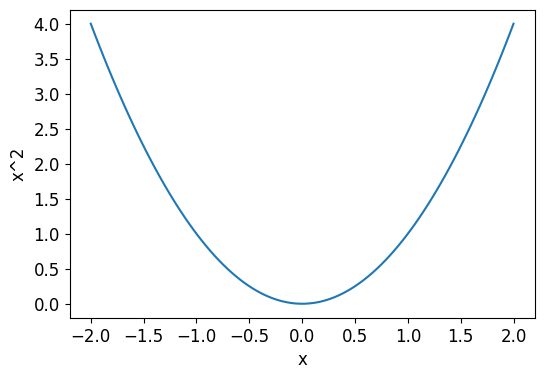

In [325]:
plot_function(f, 'x', 'x^2')

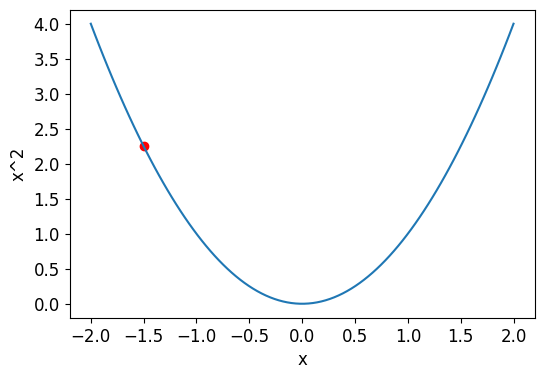

In [326]:
plot_function(f, 'x', 'x^2')
plt.scatter(-1.5, f(-1.5), color='red')

In [327]:
xt = tensor(3.).requires_grad_()
xt

tensor(3., requires_grad=True)

In [328]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [329]:
yt.backward()

In [330]:
xt.grad

tensor(6.)

In [331]:
xt = tensor([5., 6., 10.]).requires_grad_()
xt

tensor([ 5.,  6., 10.], requires_grad=True)

In [332]:
yt = f(xt)
yt

tensor([ 25.,  36., 100.], grad_fn=<PowBackward0>)

In [333]:
yt.sum().backward()

In [334]:
xt.grad

tensor([10., 12., 20.])

w -= w.grad * lr

## An End-to-End SGD Example

In [335]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

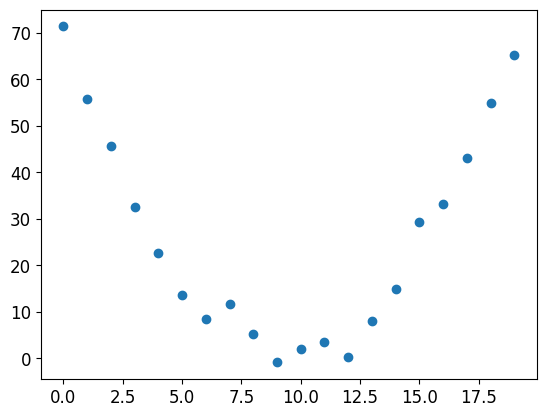

In [336]:
speed = torch.randn(20) * 3 + 3/4 * (time - 9.5) ** 2 + 1
plt.scatter(time, speed)

In [337]:
def f(t, params):
    a, b, c = params
    return a * (t ** 2) + (b * t) + c

In [338]:
def mse(preds, targets): return ((preds - targets) ** 2).mean()

In [339]:
params = torch.randn(3).requires_grad_()

In [340]:
preds = f(time, params)

In [341]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

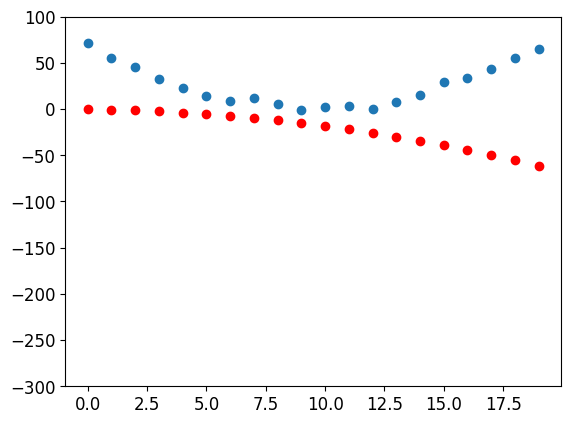

In [342]:
show_preds(preds)

In [343]:
loss = mse(preds, speed)
loss

tensor(3352.2446, grad_fn=<MeanBackward0>)

In [344]:
loss.backward()

In [345]:
params.grad

tensor([-17376.0156,  -1118.4905,    -95.9205])

In [346]:
lr = 1e-6 * 2

In [347]:
params.data -= lr * params.grad.data

In [348]:
params.grad = None

In [349]:
preds = f(time, params)

In [350]:
mse(preds, speed)

tensor(2780.1313, grad_fn=<MeanBackward0>)

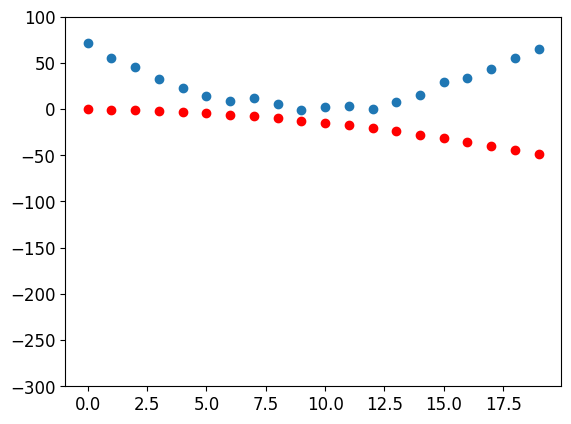

In [351]:
show_preds(preds)

In [352]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [353]:
for i in range(1000): apply_step(params)

2780.13134765625
2330.009521484375
1975.8662109375
1697.236572265625
1478.0181884765625
1305.543701171875
1169.8453369140625
1063.0816650390625
979.0828247070312
912.9948120117188
860.99853515625
820.0892333984375
787.9027099609375
762.5791625976562
742.6551513671875
726.9793090820312
714.6458740234375
704.9420166015625
697.3072509765625
691.3001708984375
686.5738525390625
682.855224609375
679.9292602539062
677.6270751953125
675.8155517578125
674.3902587890625
673.2686157226562
672.385986328125
671.6913452148438
671.1446533203125
670.7144165039062
670.3757934570312
670.1090087890625
669.899169921875
669.7338256835938
669.6035766601562
669.5008544921875
669.419921875
669.3561401367188
669.3056030273438
669.2658081054688
669.234375
669.2094116210938
669.1896362304688
669.1739501953125
669.1613159179688
669.1513061523438
669.1431884765625
669.1365966796875
669.1314086914062
669.1270751953125
669.1235961914062
669.1205444335938
669.1179809570312
669.1158447265625
669.1138916015625
669.1123

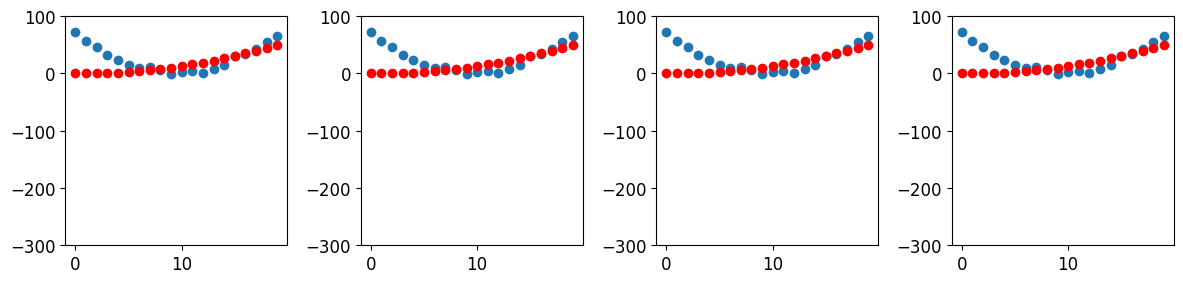

In [354]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()